In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data["Response"].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

## Droping Values and ading Customer as Index

In [6]:
data = data.drop(["Effective To Date"], axis=1) 

In [7]:
data = data.set_index("Customer")

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null

In [9]:
#checking for NaNs
data.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [10]:
#checking for 0
data.isin([0]).sum()

State                               0
Customer Lifetime Value             0
Response                            0
Coverage                            0
Education                           0
EmploymentStatus                    0
Gender                              0
Income                           2317
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           314
Months Since Policy Inception      83
Number of Open Complaints        7252
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
dtype: int64

In [11]:
#checking on duplicates
data=data.drop_duplicates()
data.shape

(8971, 22)

## Ordinals into numerical

In [12]:
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
data['Coverage'] = data['Coverage'].map(coverage_dict)

education_dict = {'High School or Below': 0, 'College':1, 'Bachelor':2,'Master':3,'Doctor':4}
data['Education'] = data['Education'].map(education_dict)

vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
data['Vehicle Size'] = data['Vehicle Size'].map(vehicle_dict)

## Getting rid of outliers

In [13]:
data.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,0,2,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,1
QZ44356,Arizona,6979.535903,No,1,2,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,1
AI49188,Nevada,12887.431650,No,2,2,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,1
WW63253,California,7645.861827,No,0,2,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,1
HB64268,Washington,2813.692575,No,0,2,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,1


In [14]:
#sns.pairplot(data)

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

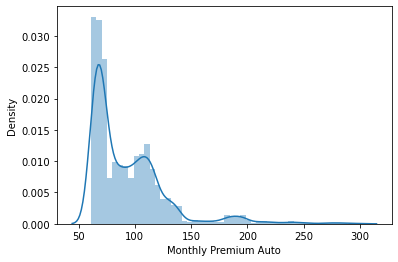

In [15]:
sns.distplot(data['Monthly Premium Auto'])

In [16]:
data.shape

(8971, 22)

In [17]:

#def boxplot_ordinals(ordinal, target):
   # df = pd.DataFrame(data= [data[ordinal], data[target]])
    #df = df.T
    #sns.boxplot(x=ordinal, y=target, data=df)
    #plt.show()
    #return plt.show()

In [18]:
data["Monthly Premium Auto"].unique()

array([ 69,  94, 108, 106,  73,  67, 101,  71,  93, 110,  70,  64,  72,
        74,  79,  61, 111, 139,  80,  63, 237,  65,  62, 117,  91,  90,
        66,  99, 103, 172,  92, 104, 113, 124, 105, 100, 112,  97,  95,
       102, 186,  77,  96,  76, 119,  88, 109, 107, 130,  85,  98, 133,
        86,  78,  83,  68, 192, 118,  89, 140, 127, 168, 126,  82, 115,
       217, 114, 138,  81, 255, 150, 123, 116, 190, 159,  84, 152, 136,
       245, 135, 128, 225, 132, 153, 121, 154, 161, 156, 171,  87, 244,
       183, 176, 230, 129, 177, 196, 131, 276, 253, 137, 180, 203, 147,
       165, 198, 125, 193, 271, 188, 142, 206, 182, 189, 160, 295, 210,
       134, 239, 256, 173, 285, 148, 197, 199, 214, 175, 167, 194, 164,
       181, 222, 215, 283, 169, 248, 223, 273, 151, 213, 145, 185, 287,
       297, 201, 149, 146, 235, 268, 211, 187, 141, 242, 170, 122, 143,
       155, 166, 212, 249, 240, 191, 195, 216, 144, 179, 232, 158, 207,
       184, 238, 229, 220, 178, 204, 281, 234, 218, 275, 209, 26

In [19]:
#boxplot_ordinals('Monthly Premium Auto',"Total Claim Amount")

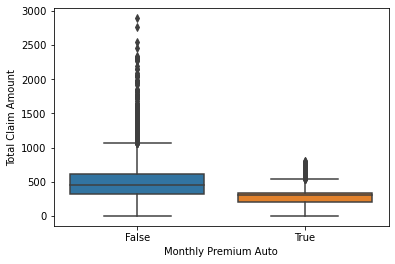

In [20]:
#df = pd.DataFrame(data= [(data['Monthly Premium Auto']<70), data["Total Claim Amount"]])
#df = df.T
sns.boxplot(x=(data['Monthly Premium Auto']<70), y=data["Total Claim Amount"])
plt.show()

In [21]:
iqr = np.percentile(data['Monthly Premium Auto'],75) - np.percentile(data['Monthly Premium Auto'],25)
upper_limit = np.percentile(data['Monthly Premium Auto'],75) + 1.5*iqr
lower_limit = np.percentile(data['Monthly Premium Auto'],25) - 1.5*iqr

In [22]:
#data = data[(data['Monthly Premium Auto']>lower_limit) & (data['Monthly Premium Auto']<upper_limit)]
#sns.distplot(data['Monthly Premium Auto'])
#plt.show()

In [23]:
# it gave me a bad r2 score if i dropped the outliers, So i figierd its better not to

In [24]:
data.shape

(8971, 22)

## Splitting the Dataset intot Cattegoricals and Numaricals

In [25]:
cat=data.select_dtypes(np.object)
numeric=data.select_dtypes(np.number)

## Getting the Correlation figierd out

In [26]:
correlationdataP=numeric.corr()

In [27]:
numeric.head()

,Customer Lifetime Value,Coverage,Education,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Vehicle Size
Customer,,,,,,,,,,,
BU79786,2763.519279,0,2,56274,69,32,5,0,1,384.811147,1
QZ44356,6979.535903,1,2,0,94,13,42,0,8,1131.464935,1
AI49188,12887.431650,2,2,48767,108,18,38,0,2,566.472247,1
WW63253,7645.861827,0,2,0,106,18,65,0,7,529.881344,1
HB64268,2813.692575,0,2,43836,73,12,44,0,1,138.130879,1


In [28]:
correlationP=numeric.corr()

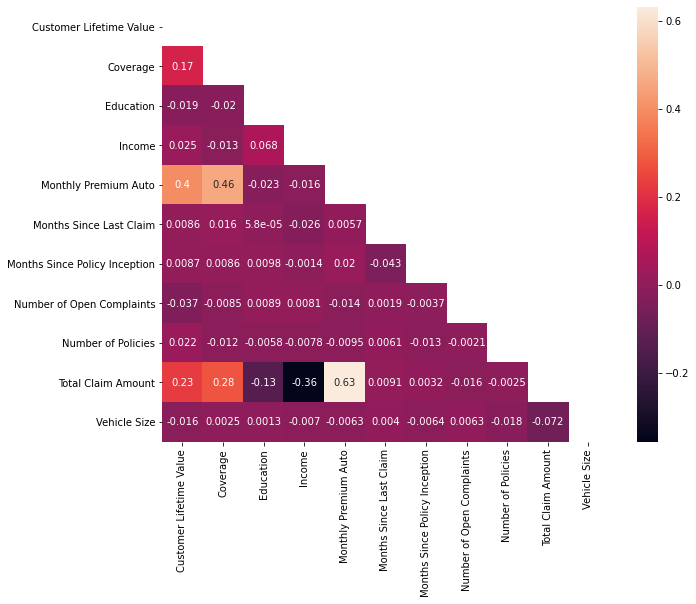

In [29]:
mask = np.triu(np.ones_like(correlationP, dtype=bool)) 
fig,ax=plt.subplots(figsize=(10,8))
ax=sns.heatmap(correlationP,mask=mask,annot=True)
plt.show()

##  Define target and Dropping the target Value

In [30]:
target=data["Total Claim Amount"]

In [31]:
numeric=numeric.drop(["Total Claim Amount","Income","Customer Lifetime Value","Coverage","Vehicle Size"],axis=1)
# I droped that many cuz my r2 value didnt change, i did them one by one and it stayed the same

In [32]:
#for i in range (9):
 #   sns.distplot(numeric.iloc[:,i])
  #  plt.show()
    

In [33]:
#for i in range (9):
 #   sns.boxplot(numeric.iloc[:,i])
  #  plt.show()

In [34]:
numeric.shape

(8971, 6)

## Normalize the numeric values 

In [35]:

#transformer = StandardScaler().fit(numeric)


#x_normalized = pd.DataFrame(transformer.transform(numeric))
#print(x_normalized.shape)



## Transform our cattegoricals into numbers

In [36]:
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(cat) 



encoded = pd.DataFrame(encoder.transform(cat).toarray())

encoded.shape

(8971, 35)

In [37]:
encoded.columns=encoder.get_feature_names()

## getting the Columnnames

In [38]:
#x_normalized.columns = numeric.columns
#x_normalized.columns

In [39]:
numeric.head()

,Education,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
Customer,,,,,,
BU79786,2,69,32,5,0,1
QZ44356,2,94,13,42,0,8
AI49188,2,108,18,38,0,2
WW63253,2,106,18,65,0,7
HB64268,2,73,12,44,0,1


In [40]:
numeric.shape

(8971, 6)

In [41]:
Ind = numeric.index

In [42]:
encoded = encoded.set_index(Ind)

## Combining the Datasets back together 

In [43]:
merged=pd.concat([numeric,encoded],axis=1)

In [44]:
merged


,Education,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_Yes,x2_Employed,x2_Medical Leave,x2_Retired,x2_Unemployed,x3_M,x4_Suburban,x4_Urban,x5_Married,x5_Single,x6_Personal Auto,x6_Special Auto,x7_Corporate L2,x7_Corporate L3,x7_Personal L1,x7_Personal L2,x7_Personal L3,x7_Special L1,x7_Special L2,x7_Special L3,x8_Offer2,x8_Offer3,x8_Offer4,x9_Branch,x9_Call Center,x9_Web,x10_Luxury Car,x10_Luxury SUV,x10_SUV,x10_Sports Car,x10_Two-Door Car
Customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,2,69,32,5,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
QZ44356,2,94,13,42,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AI49188,2,108,18,38,0,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
WW63253,2,106,18,65,0,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
HB64268,2,73,12,44,0,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YM19146,1,104,16,58,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
LA72316,2,73,18,89,0,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TD14365,2,85,9,37,3,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting Train and test set

In [45]:
merged.shape

(8971, 41)

In [46]:
target.shape

(8971,)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(merged, target, test_size=0.3, random_state=100)

In [48]:
train_index=X_train.index
print(train_index)

Index(['XY33610', 'RM83767', 'TN54884', 'CV40610', 'KB25170', 'WH56217',
       'ZF40671', 'SM54018', 'VI34110', 'HN54181',
       ...
       'RN41087', 'EA27048', 'DG68667', 'DK81475', 'TU72516', 'RO30676',
       'OM82309', 'PR37714', 'AA56476', 'MM67983'],
      dtype='object', name='Customer', length=6279)


In [49]:
test_index=X_test.index
print(test_index)

Index(['DQ10761', 'MQ93707', 'DS50601', 'AP95078', 'CW38361', 'BM30720',
       'RA17555', 'WY53775', 'UK59933', 'FL96333',
       ...
       'HI36042', 'NA43540', 'VY75186', 'CK31454', 'HO81102', 'TA82973',
       'VN57368', 'GB35238', 'MZ65087', 'YQ79307'],
      dtype='object', name='Customer', length=2692)


In [50]:
# We fit the normalizer
transformer = StandardScaler().fit(X_train)


X_train_normal = pd.DataFrame(transformer.transform(X_train),index=train_index)
print(X_train_normal.shape)




(6279, 41)


In [51]:


# We transform our data
x_test_normal = pd.DataFrame(transformer.transform(X_test),index=test_index)
print(x_test_normal.shape)




(2692, 41)


In [52]:
lm = linear_model.LinearRegression()

# We "train" our linear model based on the data available on X_train and y_train
model = lm.fit(X_train_normal,y_train)

In [53]:
predictions  = lm.predict(x_test_normal)

In [62]:
predictions.shape

(2692,)

In [54]:
print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),3))

The R2 of the linear model is:  0.783


In [55]:
mse = mean_squared_error(y_test, predictions)
print(mse)

17700.51133354422


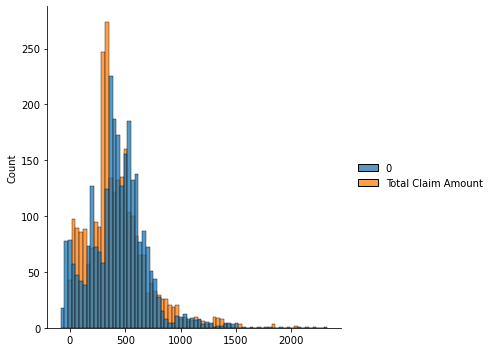

In [68]:
sns.displot([predictions,y_test])
plt.show()

## Trying to make a Polynominal function to work

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train_normal,y_train)
predict_ = poly.fit_transform(x_test_normal)

In [67]:
predict_.shape

(2692, 903)

In [70]:
clf = linear_model.LinearRegression()
clf.fit(X_, target)
print clf.predict(predict_)

SyntaxError: invalid syntax (<ipython-input-70-68ed27f35d47>, line 3)

In [60]:
print("The R2 of the linear model is: ",round(r2_score(y_test, predict_),3))

ValueError: y_true and y_pred have different number of output (1!=903)